# La polaridad geomagnética de la Tierra y la distribución Gamma

Benjamin Aguilar

El campo magnético de la Tierra varía con el tiempo. El aspecto más dramático de esta variación es que invierte su polaridad. La estructura del campo, tanto en el estado normal como en el invertido, es dipolar (como un imán). Sin embargo las ubicaciones de los polos pueden cambiar. La escala de tiempo que tarda el campo en revertirse es relativamente corta (unos pocos miles de años) en comparación con el tiempo que suele estar en una polaridad determinada.

![](normal_reversed.png)
> Fuente: Earth’s Dynamic Systems (10th Edition) Hamblin, W. K. and Christiansen, E. H.



En la clase pasada ya hemos tratado en detalle los datos obtenidos por los barcos de investigación que llevan un magnetómetro para medir las anomalías magnéticas marinas. Como vimos, la corteza oceánica registra la historia de las inversiones magnéticas a medida que se forma en la dorsal. A ambos de sus lados se registra el mismo patrón de inversiones que conducen a la simetría alrededor de la dorsal. Tanto las anomalías magnéticas marinas como los registros del campo magnético en la Tierra en rocas sedimentarias y flujos de lava han llevado al desarrollo de la escala de tiempo de polaridad geomagnética (GPTS).

![](GPTS.png)
> Fuente: Gee and Kent (2007) "Source of Oceanic Magnetic Anomalies and the Geomagnetic Polarity Timescale"


## Inversiones geomagnéticas y la distribución de Poisson

Las inversiones geomagnéticas a menudo se interpretan como un proceso de Poisson. Recuerde de la clase que revisamos que un proceso de Poisson cumple con los siguientes criterios:

* Los eventos son independientes entre sí.
* La tasa promedio (eventos por período de tiempo) es constante.
* No pueden ocurrir dos eventos al mismo tiempo.

En clase, usamos una distribución de Poisson para describir la posibilidad de observar meteoros asociados con una lluvia de meteoritos.

## Setup

Corre esta celda para cargar las librerias que usaremos.

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 160
import numpy as np
import scipy as sp
from scipy.special import gamma

Importe los datos de la escala de tiempo de polaridad geomagnética (GPTS, en inglés) de los últimos 40 millones de años como un dataframe pandas. 

El archivo ``GPTS.csv`` tiene una fecha de inicio y finalización para cada zona de polaridad junto con su polaridad.

In [71]:
GPTS = pd.read_csv('GPTS.csv')
GPTS

,Start_Myr,End_Myr,Polarity
0,0.780,0.000,normal
1,0.990,0.780,reverse
2,1.070,0.990,normal
3,1.201,1.070,reverse
4,1.211,1.201,normal
5,1.770,1.211,reverse
6,1.950,1.770,normal
7,2.140,1.950,reverse
8,2.150,2.140,normal
9,2.581,2.150,reverse


Usemos ``plt.fill()`` para hacer una gráfica que se parezca a la escala de tiempo de polaridad geomagnética que se mostró arriba. Para hacer tal gráfico, hagamos una lista de tiempos de inversión cuando el campo cambió de normal (1) a inverso (-1) y una lista de tiempo adjunta que luego podemos plotear:

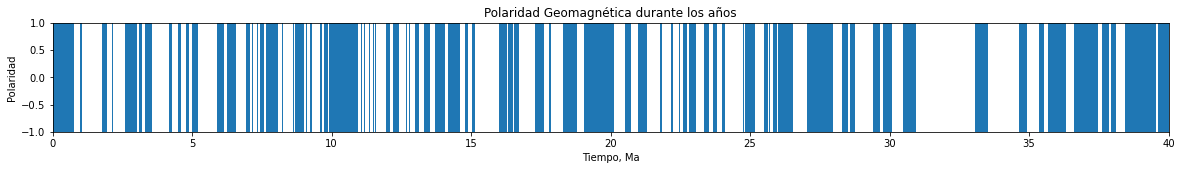

In [5]:
polarity_code = []
time_list = []

for i in GPTS.index:
    if GPTS['Polarity'][i] == 'normal':
        polarity_code.append(-1)
        polarity_code.append(1)
        time_list.append(GPTS['End_Myr'][i])
        time_list.append(GPTS['End_Myr'][i])
    if GPTS['Polarity'][i] == 'reverse':
        polarity_code.append(1)
        polarity_code.append(-1)
        time_list.append(GPTS['End_Myr'][i])
        time_list.append(GPTS['End_Myr'][i])
        
plt.figure(1,(20,2))
plt.fill(time_list,polarity_code)
plt.xlabel('Tiempo, Ma')
plt.ylabel('Polaridad')
plt.xlim(0,40)
plt.ylim(-1,1)
plt.title('Polaridad Geomagnética durante los años')
plt.show()

Calcule la duración media de una polaridad magnética.

Para hacer esto, puede crear una nueva columna en el dataframe para la duración una polaridad donde calcules la edad de fin menos el comienzo de una polarización. 

Luego puede usar ``np.mean()`` para calcular la duración media.

In [72]:
Dif=GPTS['Start_Myr']-GPTS['End_Myr']
GPTS['Diferencia']=Dif
media=np.mean(GPTS['Diferencia'])

0.25785625

¿Cómo se compara la duración de la zona de polaridad actual con la duración promedio de una polaridad (es decir, el tiempo entre inversiones) durante los últimos 40 millones de años?

Es casi 3 veces mayor que la duracion promedio calculada.

**Plotee un histograma de la duración de la zona de polaridad**

Esta es una distribución empírica (es decir, son los datos observados). Cuando haga el histograma, asegúrese de que ``density = True``

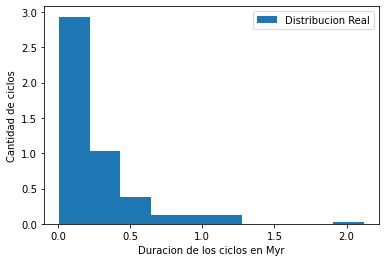

In [142]:
plt.hist(GPTS['Diferencia'],density=True,label='Distribucion Real')
plt.xlabel('Duracion de los ciclos en Myr')
plt.ylabel('Cantidad de ciclos')
plt.legend()
plt.show()

**¿Qué percentil es la duración de polarización actual?**

Si un valor es el menor (menor duración), tendrá un precentil de 0. Si es el mayor (mayor duración), tendrá un precentil de 100. La mediana es el percentil 50. Si tengo 124 valores y el valor para el que estoy calculando el percentil está en el 119 valor más grande, tienes un percentil de 119/124 = percentil 96.

Para determinar el percentil, puede ordenar los datos según la duración de la zona de polaridad. Puede hacer esto aplicando la función ``.sort_values()`` al dataframe con el nombre de su columna donde tienes la duración de cada polaridad. También incluya el parámetro ``inplace = True`` para que permanezca ordenado. Para determinar qué rango tiene, puede usar la función ``.reset_index(inplace = True)`` en el dataframe y luego encontrar qué rango es, que luego puede usar para calcular el percentil.

Los detalles sobre el percentil se pueden encontrar en este link: https://www.inferentialthinking.com/chapters/13/1/Percentiles.html

Tenga en cuenta que la función de percentil a la que se refieren es ``np.percentile``

In [74]:
GPTS.sort_values(by=['Diferencia'],inplace=True)
GPTS.reset_index(inplace = True)

In [76]:
GPTS['Percentil']=GPTS.index/160
GPTS

,index,Start_Myr,End_Myr,Polarity,Diferencia,Percentil
0,8,2.150,2.140,normal,0.010,0.00000
1,4,1.211,1.201,normal,0.010,0.00625
2,58,11.363,11.352,normal,0.011,0.01250
3,44,9.117,9.097,normal,0.020,0.01875
4,61,11.555,11.531,reverse,0.024,0.02500
5,56,11.193,11.167,normal,0.026,0.03125
6,124,25.705,25.678,normal,0.027,0.03750
7,62,11.584,11.555,normal,0.029,0.04375
8,123,25.678,25.648,reverse,0.030,0.05000
9,68,12.708,12.678,normal,0.030,0.05625


Calculando el percentil de las duraciones de polarizacion, obtenemos que la duracion actual esta en el percentil 93,75

## ¿Podemos describir la duración de la zona de polaridad con una distribución teórica?

**Distribución gamma:**

En clase, discutimos la distribución binomial y la distribución de Poisson. Otra distribución relacionada es la distribución Gamma. La distribución Gamma es la probabilidad de un tiempo de espera dado entre eventos distribuidos por Poisson (es decir, un evento que ocurre al azar pero para el cual hay un período de tiempo promedio entre los eventos).

La distribución Gamma da la probabilidad de un tiempo de espera entre eventos distribuidos de Poisson. Para aquellos de ustedes que apreciarán la base teórica de esta función, aquí está a continuación. Pero probablemente lo entenderá mejor si lo pone en acción:

**Teórico**

Considere la función de distribución  $D(x)$ de los tiempos de espera hasta el $h$-ésimo evento de Poisson dada una distribución de Poisson con una tasa de cambio $\lambda$,

$$D(x) = P(X \le x) = 1 - P(X > x) = 1-\sum_{k=0}^{h-1}\frac{(\lambda x)^{k}e^{-\lambda x}}{k!} = 1-e^{-\lambda x}\sum_{k=0}^{h-1}\frac{(\lambda x)^{k}}{k!} = 1-\frac{\Gamma(h,x\lambda) }{\Gamma (h)}$$

donde $\Gamma(x) = (x-1)! $ es una función gamma completa y $\displaystyle \Gamma(n, x) = (n-1)! e^{- x} \sum_ {k = 0}^{n-1} \frac {x^{k}} {k!} $ una función gamma incompleta. La función de probabilidad correspondiente $P(x)$ de tiempos de espera hasta el $h$-ésimo evento de Poisson se obtiene al diferenciar $D(x)$,
$$ P(x) = D'(x) = \frac{\lambda (\lambda x)^{h-1}}{(h-1)!}e^{-\lambda x}$$
Ahora sea $ \alpha = h $ (no necesariamente un número entero) y defina $ \theta = 1/\lambda $ como el tiempo entre cambios. Entonces la ecuación anterior se puede escribir
$$P(x) = \frac{x^{\alpha-1}e^{-x/\theta}}{\Gamma (\alpha) \theta^{\alpha}}$$
que es la probabilidad de un tiempo de duración $ x $ entre eventos. 

$\theta$ es el tiempo esperado entre inversiones y seguiremos a McFadden (1984) y definiremos $ \theta = \mu/\alpha $ donde $\mu$ es la duración media una polaridad. Un valor de $\alpha$ mayor que uno se puede interpretar como un artefacto vinculado a algunos intervalos cortos que faltan en el GPTS o a alguna memoria a corto plazo dentro de la dínamo que inhibiría una segunda inversión justo después de que haya ocurrido la primera. McFadden (1984) usa un valor para $\alpha$ de 1.2.

In [89]:
def gamma_probability(x,mu,alpha):
    prob=(x**(alpha-1))*(np.exp(-x/(mu/alpha)))/(gamma(alpha)*((mu/alpha)**alpha))
    return prob

Grafique la probabilidad gamma teórica en comparación con la distribución real.

Utilice la función ``gamma_probability()`` y calcule P para cada valor en un rango ``np.arrange (0.0,3.0,0.1)``. Luego, trace la curva resultante en la parte superior del histograma de duración de la polaridad. Asegúrese de etiquetar las curvas trazadas, poner una leyenda y etiquetar los ejes. Siguiendo a McFadden (1984), utilice un valor $\alpha = 1.2$.

In [95]:
media=np.mean(GPTS['Diferencia'])
x=np.arange(0.0,3.0,0.1)
distribucion_gamma=gamma_probability(x,media,1.2)


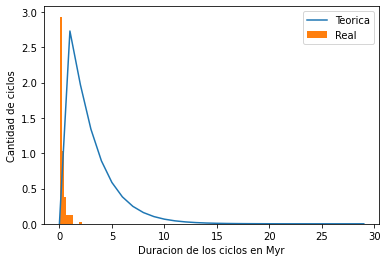

In [141]:
plt.plot(distribucion_gamma,label='Teorica')
plt.hist(GPTS['Diferencia'],density=True,label='Real')
plt.legend()
plt.xlabel('Duracion de los ciclos en Myr')
plt.ylabel('Cantidad de ciclos')
plt.show()

**Empírico vs simulado**

El GPTS observado nos da una idea de una distribución empírica. Podemos usar la función ``np.random.gamma`` para simular distribuciones empíricas también.

In [91]:
help(np.random.gamma)

Help on built-in function gamma:

gamma(...) method of numpy.random.mtrand.RandomState instance
    gamma(shape, scale=1.0, size=None)
    
    Draw samples from a Gamma distribution.
    
    Samples are drawn from a Gamma distribution with specified parameters,
    `shape` (sometimes designated "k") and `scale` (sometimes designated
    "theta"), where both parameters are > 0.
    
    .. note::
        New code should use the ``gamma`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    shape : float or array_like of floats
        The shape of the gamma distribution. Must be non-negative.
    scale : float or array_like of floats, optional
        The scale of the gamma distribution. Must be non-negative.
        Default is equal to 1.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (defa

**Utilice la función np.random.gamma para simular distintas de polaridades del campo geomágnetico**

``np.random.gamma()`` tiene 2 parámetros: shape (a veces denominada "$\alpha$") y scale (a veces denominada "$\theta$"), y un tamaño de argumento opcional. Cada llamada a ``np.random.gamma()`` devuelve una duración de una polaridad extraída de la distribución gamma.

Entonces, para obtener longitudes crónicas (o de polaridad) aleatorias, use ``np.random.gamma(shape, scale=1.0, size=None)`` donde:

* shape = 1.2 (el alfa que usamos antes)
* scale = average_polarity_zone_duration / 1.2
* size = número de las distintas "zonas" de polaridad (por lo que obtendremos datos simulados aleatorios que tienen la misma longitud que nuestro conjunto de datos original).



In [114]:
scale=media/1.2
simulados=np.random.gamma(1.2,scale,size=160)

Plotee un histograma de los datos simulados, los datos observados y la distribución teórica. Deberían verse bastante similares entre sí.

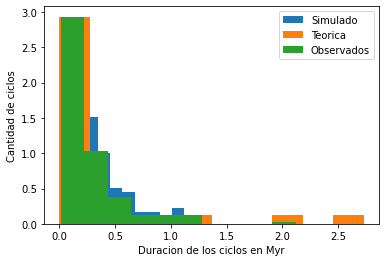

In [140]:
plt.hist(simulados,density=True,label='Simulado')
plt.hist(distribucion_gamma,density=True,label='Teorica')
plt.hist(GPTS['Diferencia'],density=True,label='Observados')
plt.xlabel('Duracion de los ciclos en Myr')
plt.ylabel('Cantidad de ciclos')
plt.legend()
plt.show()

Encuentre una manera de plotear su nueva escala de tiempo de polaridad aleatoria. La idea es que podamos compararla con de la escala de tiempo real.

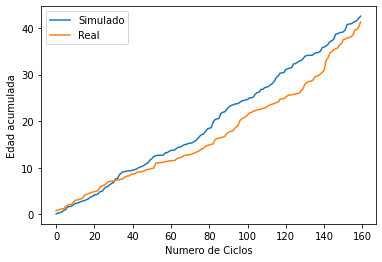

In [137]:
simulados_edad=[]
i=0
k=0
while i<len(simulados):
    simulados_edad.append(simulados[i]+k)
    k+=simulados[i]
    i+=1
#Para obntener la data del GPTS ordenada, volveremos a importarla
GPTS2=pd.read_csv('GPTS.csv')
plt.plot(simulados_edad,label='Simulado')
plt.plot(GPTS2['Start_Myr'],label='Real')
plt.xlabel('Numero de Ciclos')
plt.ylabel('Edad acumulada')
plt.legend()
plt.show()

## ¿El campo se invertirá pronto?
Pero lo que realmente nos gustaría saber es qué tan probable es que ocurra pronto una inversión de polaridad. El crono normal actual ha durado 0.78 Ma. Para encontrar la probabilidad de que ocurra una inversión en los próximos 10 mil años, necesitamos encontrar esa probabilidad de esa polaridad que sea más larga que 0.78 Ma pero más corta que 0,79 Ma.

$$P (0.78 \le X \le 0.79) = P(X \le 0.79) - P(X \le 0.78) = (1 - P(0.79)) - (1 - P(0.78))$$

Utilice la función gamma_probability para hacer este cálculo

In [145]:
P_79=gamma_probability(0.79,media,1.2)
P_78=gamma_probability(0.78,media,1.2)
P=(1-P_79)-(1-P_78)
P

0.007485773073145352

Con base en esta probabilidad, ¿cree que el campo está a punto de invertirse?

No, puesto que en un periodo de tiempo cercano la probabilidad de que esto ocurra es muy baja como lo acabamos de calcular